# Importing Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

# Loading Dataset

In [2]:
churn=pd.read_csv("churn.csv")

# Understanding Data

In [3]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn.shape

#There are 7043 rows and 21 columns

(7043, 21)

In [5]:
churn.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [6]:
churn.nunique()

#1: Except customer ID , tenure , monthly charges , Total charges all other work as a categorical data type
#2: Customer ID is of no use as it is different from each row and will not make any impact on the dependent variable

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
churn.dtypes

#1: We have to change Data type of seniorcitizen into object or categorical
#2: We have to change data type of Total cahrges into Numeric data type

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# Changing Data type
churn["gender"] = churn["gender"].astype("object")
churn["TotalCharges"] = pd.to_numeric(churn["TotalCharges"],errors="coerce")

#1: Data type of gender and Total charges has been changed
#2: But to change in data type it may happen that null values will enter in our dataset

In [9]:
churn.isnull().sum()

#1: Null values are present in total charges

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

0.961642499724251


C:\Users\HP User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


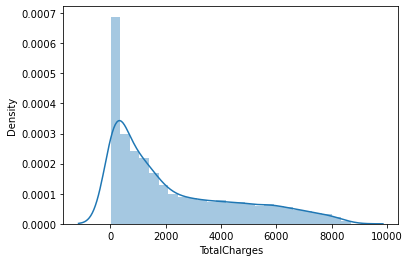

In [10]:
# Checking Distrubution of Total charges

print(churn["TotalCharges"].skew())
sns.distplot(churn["TotalCharges"])
plt.show()

#It is more likely normal distributed so we will remove null values by replacing it with the mean of Total charges.

In [11]:
#Removing null values of Total Charges

churn["TotalCharges"] = churn["TotalCharges"].fillna(churn["TotalCharges"].mean())

In [12]:
#Null values are removed
churn.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [13]:
#Diving data into two different frame to get better results.

cat_col=[]
num_col=[]
for i in  churn:
    if(churn[i].nunique()<6):
        cat_col.append(churn[i])
    else:
        num_col.append(churn[i])
cat_col = pd.DataFrame(cat_col).T
num_col = pd.DataFrame(num_col).T

In [14]:
cat_col.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [15]:
num_col.head()

,customerID,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,1,29.85,29.85
1,5575-GNVDE,34,56.95,1889.5
2,3668-QPYBK,2,53.85,108.15
3,7795-CFOCW,45,42.3,1840.75
4,9237-HQITU,2,70.7,151.65


### Will do univariate analysis on cat_col

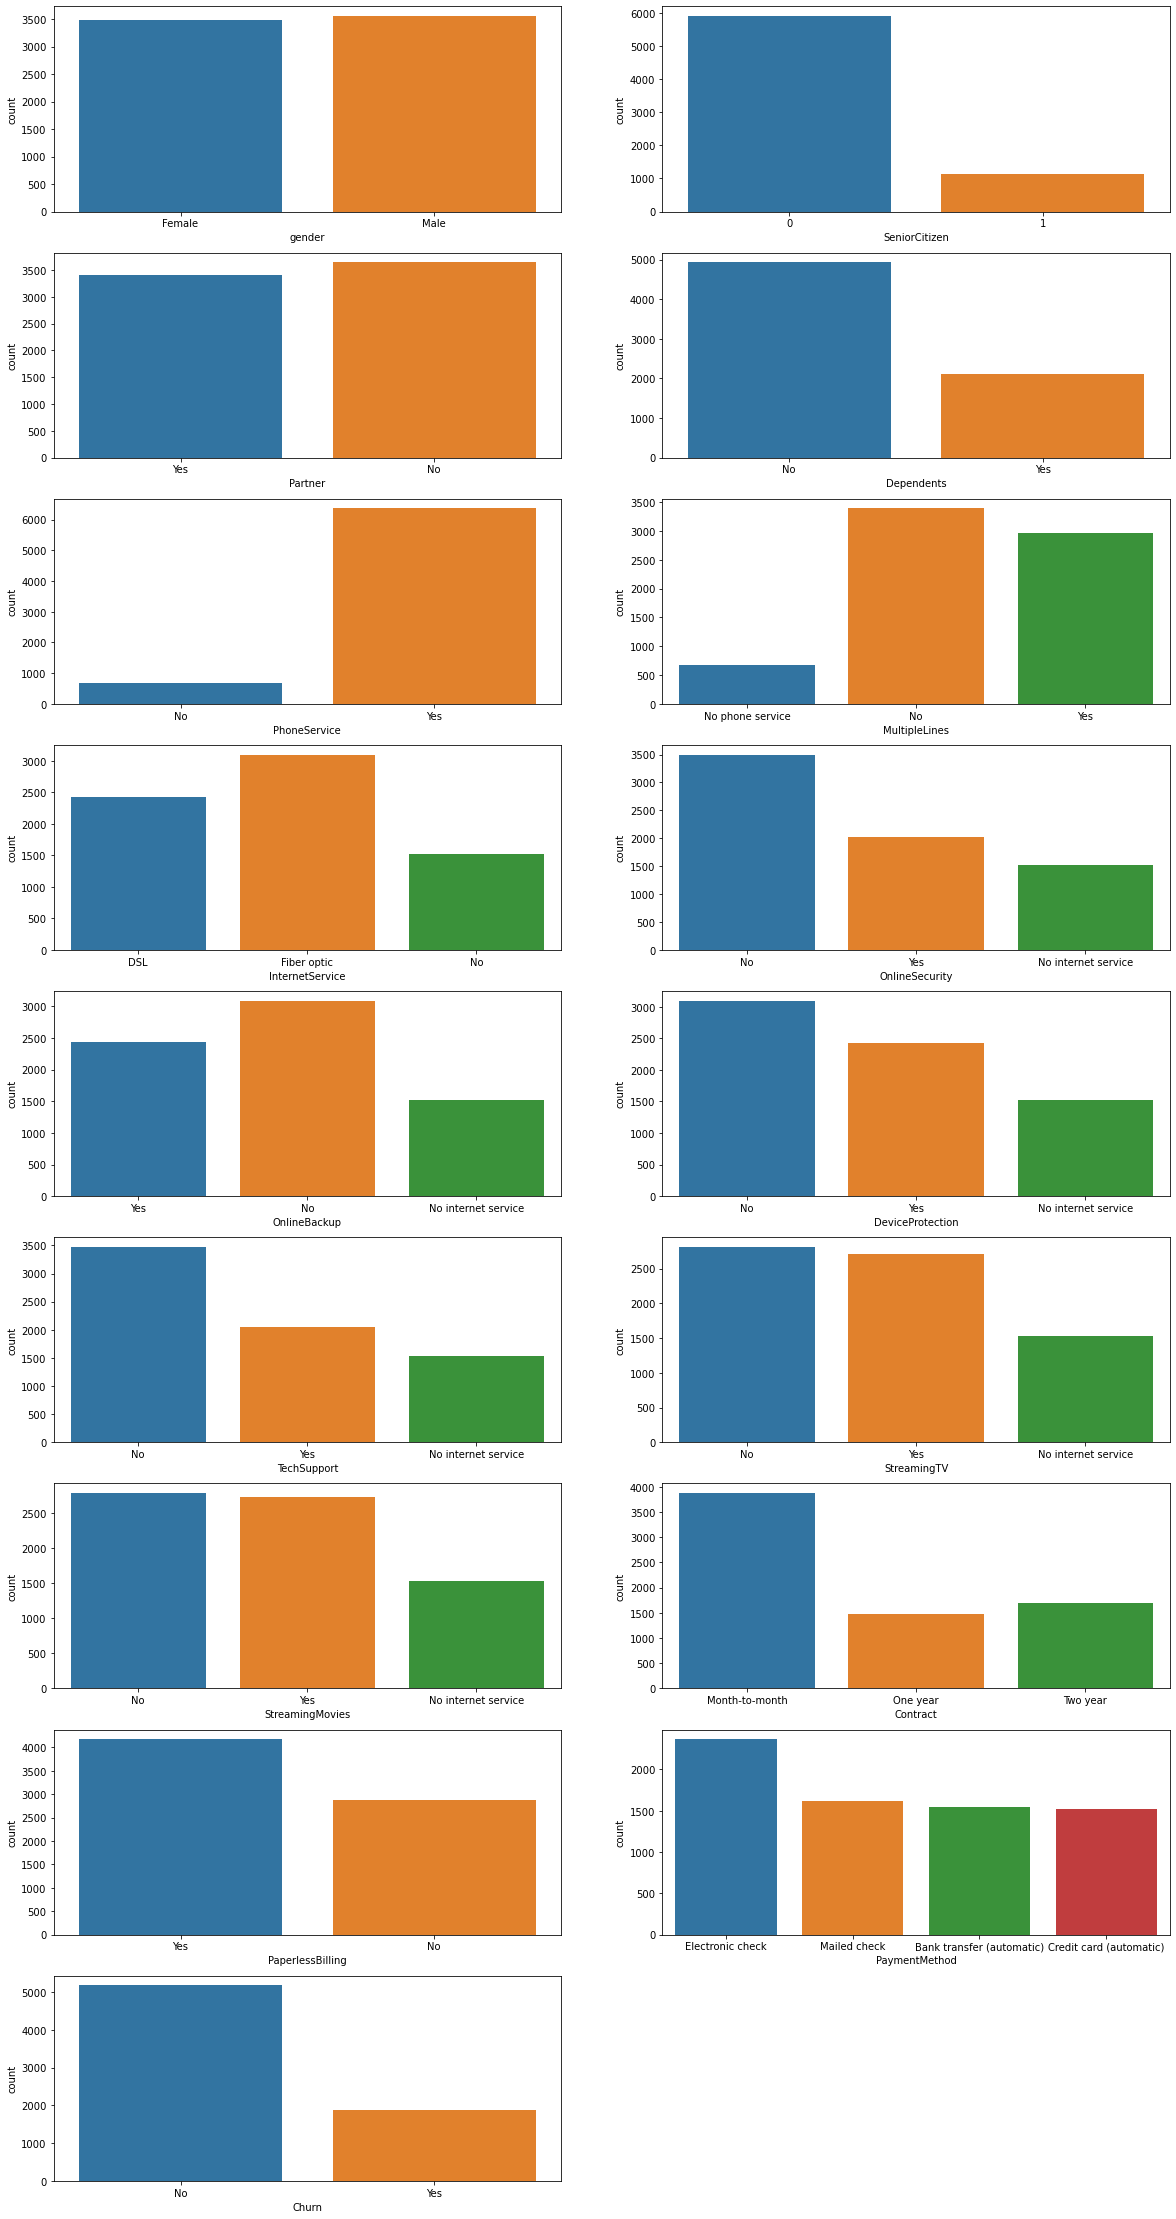

In [16]:
j = 1
plt.figure(figsize=(20,40))
for i  in cat_col:
    plt.subplot(9,2,j)
    sns.countplot(data=cat_col,x=i)
    j = j+1
plt.show()

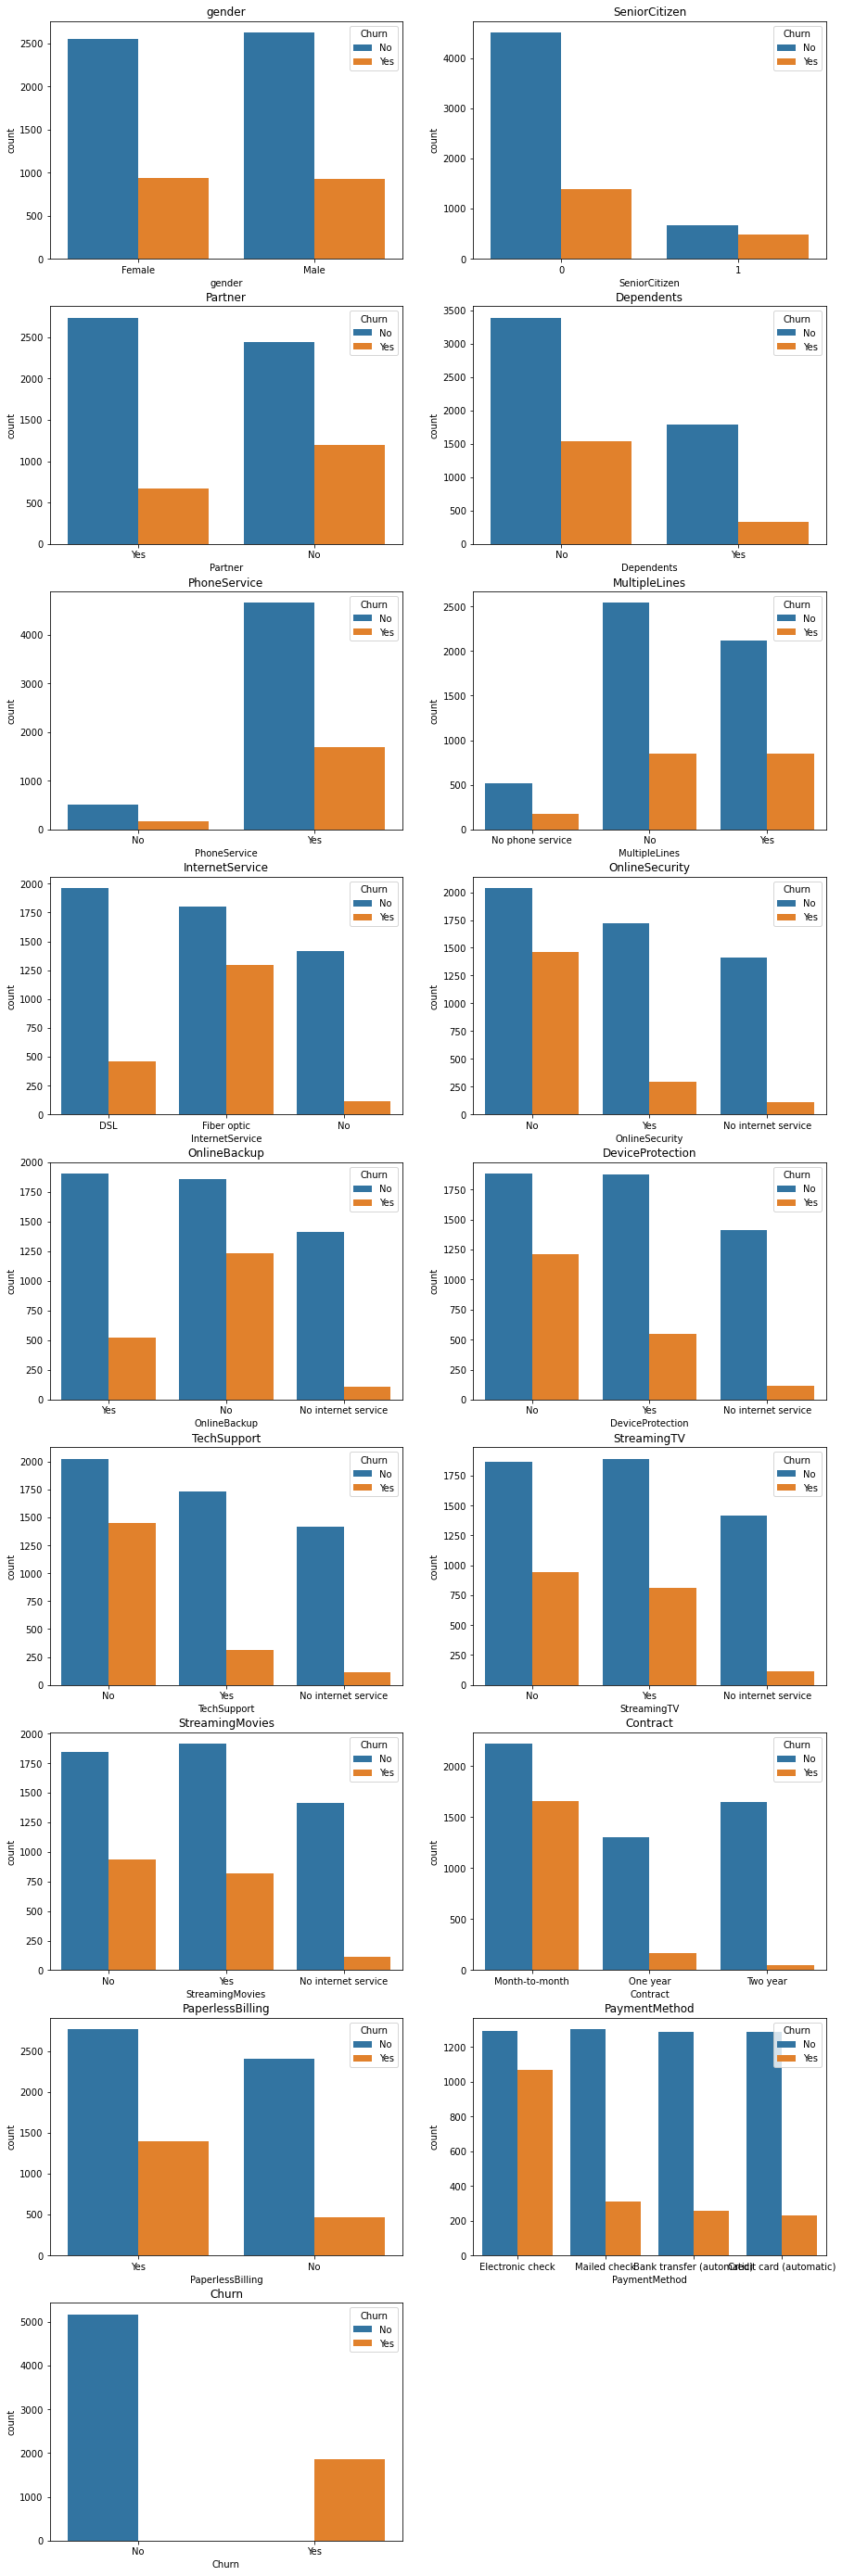

In [17]:
#Bivriate Analysis

j=1
plt.figure(figsize=(15,50))
for i in cat_col:
    plt.subplot(9,2,j)
    sns.countplot(data=cat_col,x=i,hue="Churn")
    plt.title(i)
    j = j+1
plt.show()    

### Univariate analysis on Numerical Data

In [18]:
num_col.head()

#We will remove Customer ID as it of no use because it is different from each rows and making no effect on Churn which is our
# dependent variable

,customerID,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,1,29.85,29.85
1,5575-GNVDE,34,56.95,1889.5
2,3668-QPYBK,2,53.85,108.15
3,7795-CFOCW,45,42.3,1840.75
4,9237-HQITU,2,70.7,151.65


In [19]:
# Removing customed Id
num_col.drop("customerID",axis=1,inplace=True)

C:\Users\HP User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


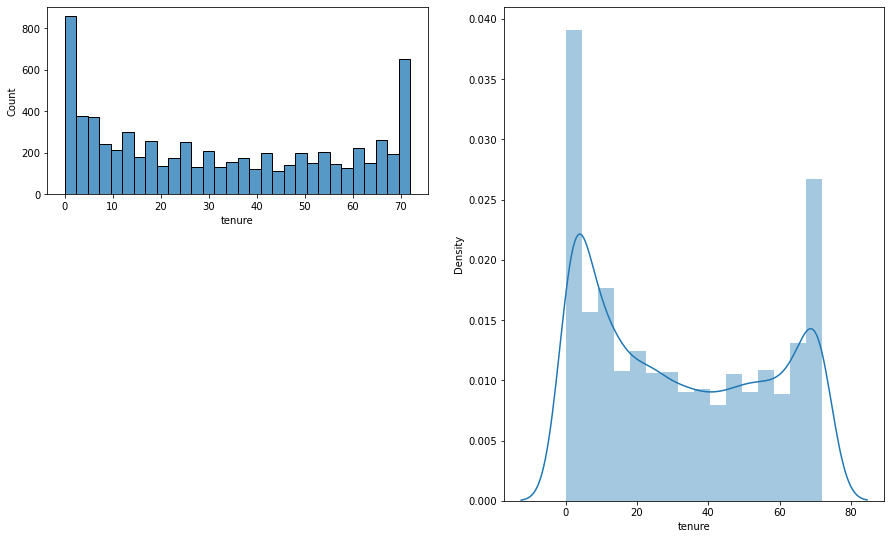

C:\Users\HP User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


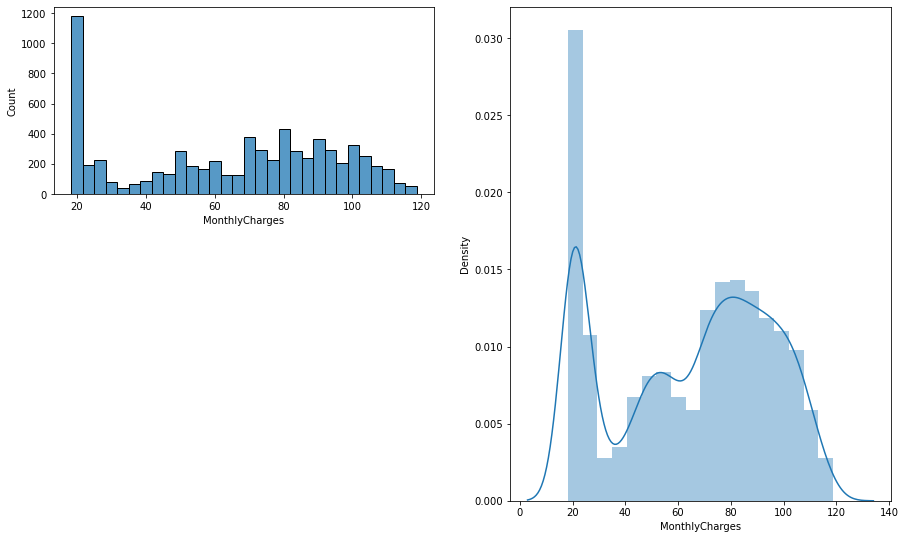

C:\Users\HP User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


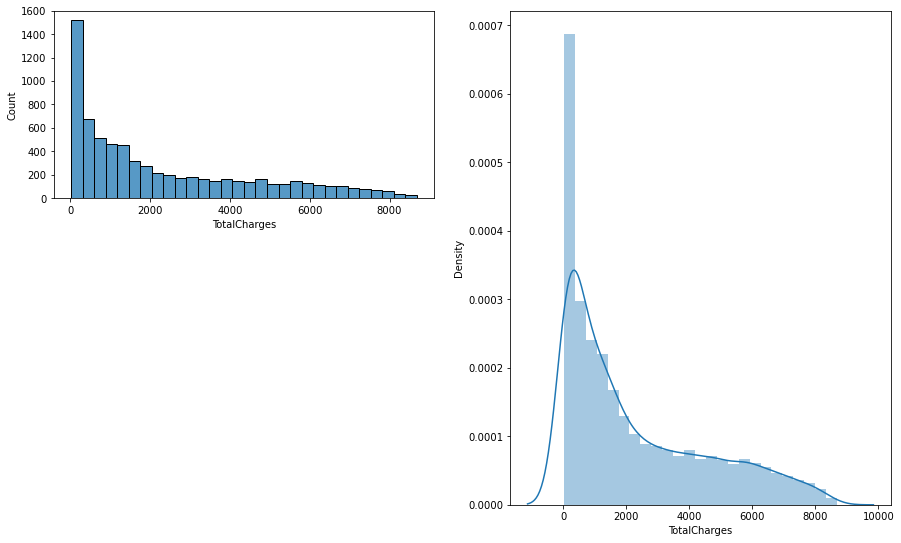

In [20]:
j=1
for i in num_col:
    plt.figure(figsize=(15,20))
    plt.subplot(5,2,j)
    sns.histplot(data=num_col,x=i,bins=30)
    plt.subplot(2,2,j+1)
    sns.distplot(num_col[i])
    plt.show()

tenure


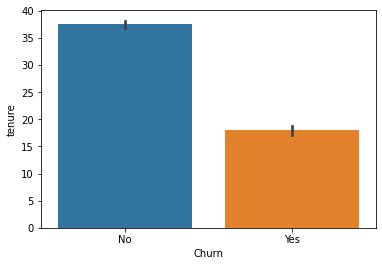

MonthlyCharges


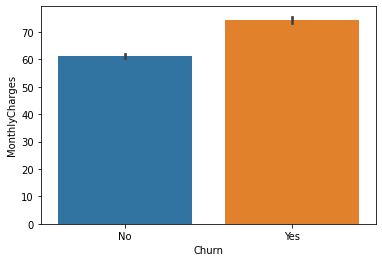

TotalCharges


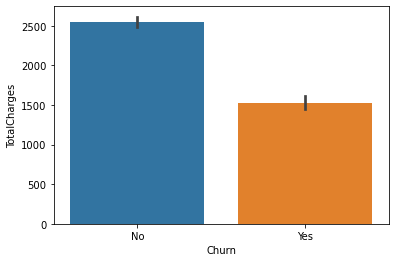

In [21]:
#Bivriate Analysis

for i in num_col:
    print(i)
    sns.barplot(data=num_col, y = i, x=cat_col["Churn"])
    plt.show()

In [23]:
# We will do Label Encoding on categorical data set.
for i in cat_col:
        cat_col[i]= le.fit_transform(cat_col[i])

In [24]:
cat_col.head()

# Label encoding implemented successfully

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [25]:
# We will make new data and combine cat_col and num_col

churn_new = pd.concat([cat_col,num_col],axis=1)

In [26]:
churn_new.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,1,29.85,29.85
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,34,56.95,1889.5
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,2,53.85,108.15
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,45,42.3,1840.75
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,2,70.7,151.65


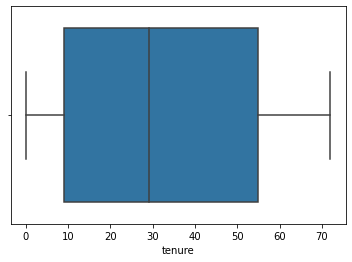

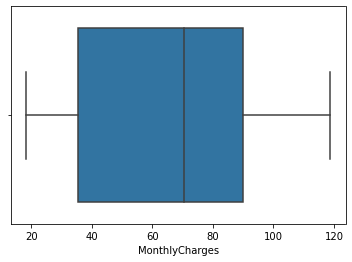

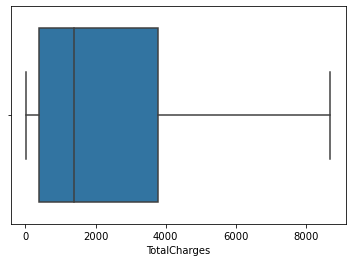

In [27]:
# Checking outliers

for i in num_col:
    sns.boxplot(data=num_col,x=i)
    plt.show()

# Modeling

In [28]:
# splitting Dataset into x and y
y= churn_new["Churn"]
x= churn_new.drop("Churn",axis=1)

In [29]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.33,random_state=0)

In [30]:
print(x_train.shape)
print(x_test.shape)

(4718, 19)
(2325, 19)


In [31]:
# Fitting logistic model
lr.fit(x_train,y_train)
lr.predict(x_test)

C:\Users\HP User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0])

In [32]:
# Checking accuracy of logistic model

print("accuracy of lr model is",accuracy_score(y_test,lr.predict(x_test)))
print("precision score ", precision_score(y_test,lr.predict(x_test)))
print("recall score  ",recall_score(y_test,lr.predict(x_test)))


accuracy of lr model is 0.7944086021505377
precision score  0.631578947368421
recall score   0.5285481239804242


In [33]:
# Fitting decision tree model
dtc.fit(x_train,y_train)
dtc.predict(x_test)

array([0, 0, 1, ..., 0, 0, 0])

In [34]:
# Checking accuracy of decision tree model

print("accuracy of Decision Tree model is",accuracy_score(y_test,dtc.predict(x_test)))
print("precision score ", precision_score(y_test,dtc.predict(x_test)))
print("recall score  ",recall_score(y_test,dtc.predict(x_test)))

accuracy of Decision Tree model is 0.7333333333333333
precision score  0.49421487603305786
recall score   0.48776508972267535


In [35]:
# Fitting random forest model
rfc.fit(x_train,y_train)
rfc.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
# Checking accuracy of random forest model

print("accuracy of Random Forest model is",accuracy_score(y_test,rfc.predict(x_test)))
print("precision score ", precision_score(y_test,rfc.predict(x_test)))
print("recall score  ",recall_score(y_test,rfc.predict(x_test)))

accuracy of Random Forest model is 0.7974193548387096
precision score  0.6437246963562753
recall score   0.5187601957585645


In [37]:
# Now we will do scaling and check whether there is any change  in result or not

ss.fit(x_train)

StandardScaler()

In [38]:
ss_x_train = ss.fit_transform(x_train)
ss_x_test = ss.fit_transform(x_test)

In [39]:
# As scaler x_train and scaler X_test is an array and we have to change it into data frame

ss_x_train = pd.DataFrame(ss_x_train,columns=x_train.columns)
ss_x_test = pd.DataFrame(ss_x_test,columns=x_test.columns)

In [40]:
ss_x_train.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges
0,-1.002547,2.309304,-0.974881,-0.656504,0.325107,1.116339,0.179237,-0.921587,1.243348,1.253232,-0.914703,1.147826,1.138583,0.380544,0.816785,-1.475807,0.963270,1.332317,1.433243
1,0.997460,-0.433031,-0.974881,-0.656504,0.325107,1.116339,0.179237,1.397371,1.243348,-1.018281,-0.914703,-1.108608,1.138583,-0.826045,0.816785,0.396432,0.554981,0.963254,0.831319
2,0.997460,-0.433031,-0.974881,-0.656504,0.325107,1.116339,-1.178129,-0.921587,-1.025942,1.253232,1.409243,-1.108608,-1.117542,-0.826045,-1.224312,1.332552,-1.282321,-0.093836,-0.985643
3,-1.002547,-0.433031,1.025766,-0.656504,0.325107,-0.990838,0.179237,-0.921587,1.243348,1.253232,-0.914703,1.147826,1.138583,0.380544,0.816785,0.396432,0.636639,1.075142,1.070228
4,-1.002547,-0.433031,-0.974881,-0.656504,0.325107,-0.990838,-1.178129,-0.921587,-1.025942,-1.018281,-0.914703,-1.108608,-1.117542,-0.826045,0.816785,0.396432,-1.282321,-0.641586,-0.992923


In [41]:
ss_x_test.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges
0,-1.023942,-0.453776,-0.950062,-0.64896,0.332137,-0.993116,-1.193722,-0.913323,1.240956,-1.047749,-0.947010,1.143984,-1.129307,0.352876,-1.167392,0.402879,-0.538611,-0.209429,-0.541667
1,0.976617,-0.453776,-0.950062,-0.64896,0.332137,1.118448,0.158155,1.427886,1.240956,1.228902,1.370672,1.143984,1.138084,0.352876,0.856610,-0.533814,1.122011,1.712667,2.080707
2,-1.023942,-0.453776,-0.950062,-0.64896,0.332137,-0.993116,-1.193722,1.427886,-1.038051,-1.047749,-0.947010,1.143984,1.138084,-0.832726,0.856610,0.402879,-0.781629,0.243119,-0.594689
3,0.976617,-0.453776,-0.950062,-0.64896,0.332137,-0.993116,1.510033,0.257281,0.101453,0.090576,0.211831,0.010240,0.004388,1.538478,-1.167392,1.339572,-1.267665,-1.451880,-0.989251
4,-1.023942,-0.453776,1.052562,-0.64896,0.332137,1.118448,0.158155,-0.913323,1.240956,-1.047749,-0.947010,-1.123504,-1.129307,-0.832726,0.856610,-0.533814,0.919496,0.434012,0.865180


# Modeling on scaler values

In [42]:
# Fitting logistic model

lr.fit(ss_x_train,y_train)
lr.predict(ss_x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
# Checking accuracy of logistic model

print("accuracy of lr model is",accuracy_score(y_test,lr.predict(ss_x_test)))
print("precision score ", precision_score(y_test,lr.predict(ss_x_test)))
print("recall score  ",recall_score(y_test,lr.predict(ss_x_test)))

# No major changes are observed

accuracy of lr model is 0.796989247311828
precision score  0.6358381502890174
recall score   0.5383360522022839


In [44]:
# Fitting decision tree model

dtc.fit(ss_x_train,y_train)
dtc.predict(ss_x_test)

array([0, 1, 1, ..., 0, 0, 0])

In [45]:
# Checking accurcy of decision tree model

print("accuracy of Decision Tree model is",accuracy_score(y_test,dtc.predict(ss_x_test)))
print("precision score ", precision_score(y_test,dtc.predict(ss_x_test)))
print("recall score  ",recall_score(y_test,dtc.predict(ss_x_test)))

# NO major changes observed

accuracy of Decision Tree model is 0.7367741935483871
precision score  0.5007898894154819
recall score   0.5171288743882545


In [46]:
# fitting random forest model

rfc.fit(ss_x_train,y_train)
rfc.predict(ss_x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
# Checking the accuracy of random forest model

print("accuracy of Random Forest model is",accuracy_score(y_test,rfc.predict(ss_x_test)))
print("precision score ", precision_score(y_test,rfc.predict(ss_x_test)))
print("recall score  ",recall_score(y_test,rfc.predict(ss_x_test)))

# No major changes observed

accuracy of Random Forest model is 0.7991397849462366
precision score  0.6483739837398373
recall score   0.5203915171288744
